In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [26]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
x_test.shape

(10000, 28, 28)

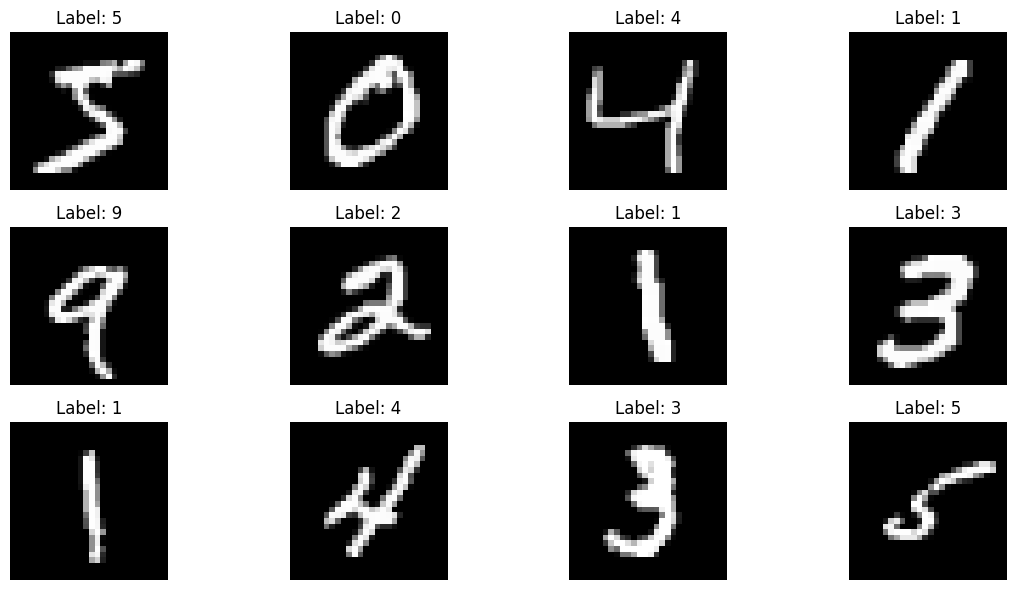

In [11]:
# Plotting the first 12 images from the training set
plt.figure(figsize=(12, 6))
for i in range(12):
    plt.subplot(3, 4, i + 1)  # 3 rows, 4 columns
    plt.imshow(x_train[i], cmap='gray')  # Display the image in grayscale
    plt.title(f"Label: {y_train[i]}")    # Display the label as the title
    plt.axis('off')  # Hide the axis for better clarity
plt.tight_layout()
plt.show()

In [29]:
# Normalize the pixel values between 0 and 1 
x_train, x_test = x_train / 255.0, x_test / 255.0

In [30]:
# Flatten the 28x28 images into vectors of size 784
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

In [31]:
# One-hot encode the labels
y_train_onehot = keras.utils.to_categorical(y_train, num_classes=10)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes=10)

In [32]:
# Define the model architecture
model = keras.models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.keras',  # Filepath where the best model will be saved
    monitor='val_loss',        # Monitor validation loss for best performance
    save_best_only=True,       # Save only the model with the best validation loss
    mode='min',                # 'min' since lower loss indicates better performance
    verbose=1
)

In [35]:
# Train the model
history = model.fit(
    x_train_flat, y_train_onehot, 
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=10, 
    batch_size=128,
    callbacks=[checkpoint_callback]
)

Epoch 1/10
347/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8052 - loss: 0.6917
Epoch 1: val_loss improved from inf to 0.19329, saving model to best_model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8121 - loss: 0.6674 - val_accuracy: 0.9463 - val_loss: 0.1933
Epoch 2/10
345/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9517 - loss: 0.1665
Epoch 2: val_loss improved from 0.19329 to 0.13338, saving model to best_model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9519 - loss: 0.1653 - val_accuracy: 0.9611 - val_loss: 0.1334
Epoch 3/10
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9671 - loss: 0.1108
Epoch 3: val_loss improved from 0.13338 to 0.11180, saving model to best_model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9671 - loss: 0.1107 - val_accuracy: 0.9659 - val_loss: 0.1118
Epoch 4/10
373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9771 - loss: 0.0777
Epoch 4: val_loss improved from 0.11180 to 0.09994, sa

In [36]:
# Load the best model later using the new format
from tensorflow.keras.models import load_model
best_model = load_model('best_model.keras')

# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(x_test_flat, y_test_onehot)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.0903

Test Accuracy: 0.9760


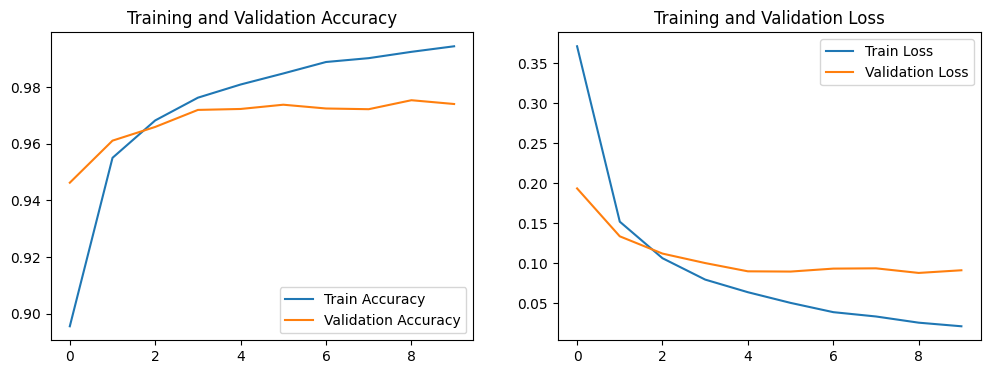

In [37]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


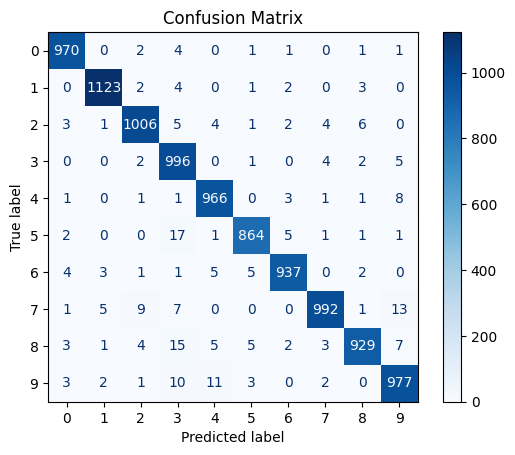

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = best_model.predict(x_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_onehot, axis=1) 

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Using CNN

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Normalize the data (scaling pixel values to [0,1])
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Reshape the data for CNN input (adding channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [5]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
# Build the CNN model
model = models.Sequential()

In [7]:
# Convolutional layers + MaxPooling
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flattening the feature maps and adding Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2,callbacks=[checkpoint_callback])

Epoch 1/10
370/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8319 - loss: 0.5675
Epoch 1: val_loss improved from inf to 0.06903, saving model to best_model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8334 - loss: 0.5624 - val_accuracy: 0.9786 - val_loss: 0.0690
Epoch 2/10
361/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9793 - loss: 0.0667
Epoch 2: val_loss improved from 0.06903 to 0.05214, saving model to best_model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9794 - loss: 0.0665 - val_accuracy: 0.9837 - val_loss: 0.0521
Epoch 3/10
373/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9867 - loss: 0.0418
Epoch 3: val_loss improved from 0.05214 to 0.04983, saving model to best_model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9867 - loss: 0.0418 - val_accuracy: 0.9853 - val_loss: 0.0498
Epoch 4/10
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9899 - loss: 0.0312
Epoch 4: val_loss improved from 0.04983 to 0.04001, sa

In [12]:
# Load the best model later using the new format
from tensorflow.keras.models import load_model
best_model = load_model('best_model.keras')

# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9880 - loss: 0.0368
Test Accuracy: 0.9903


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


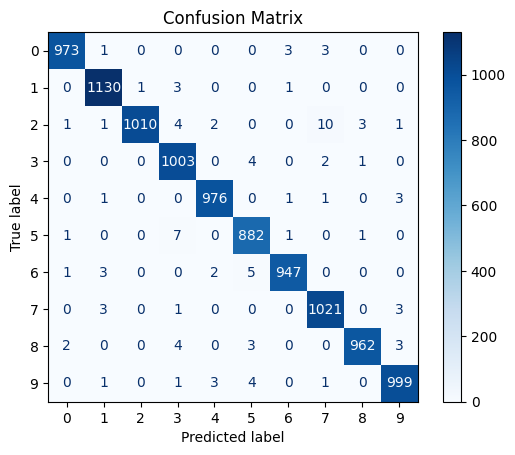

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1) 

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

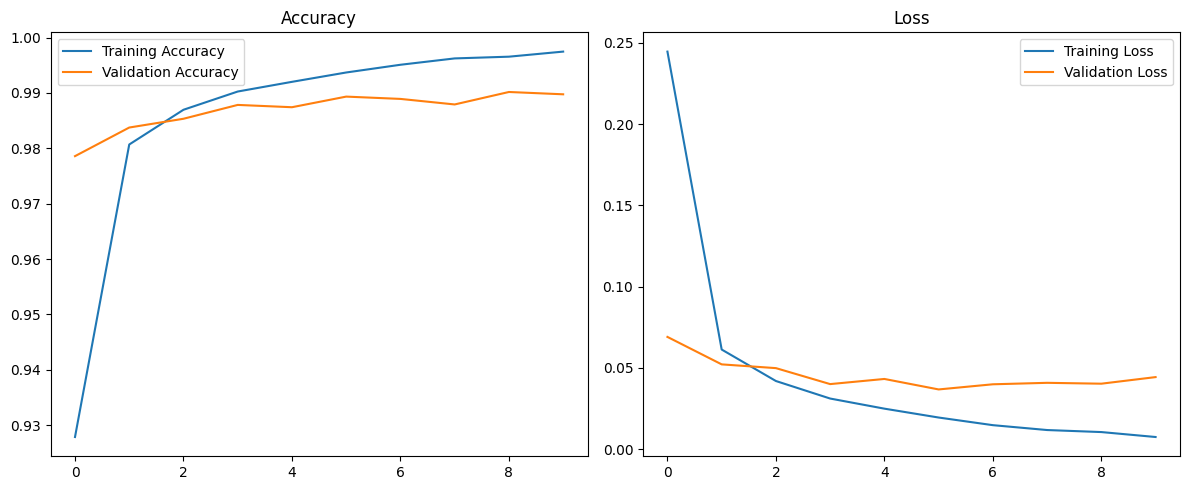

In [14]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()

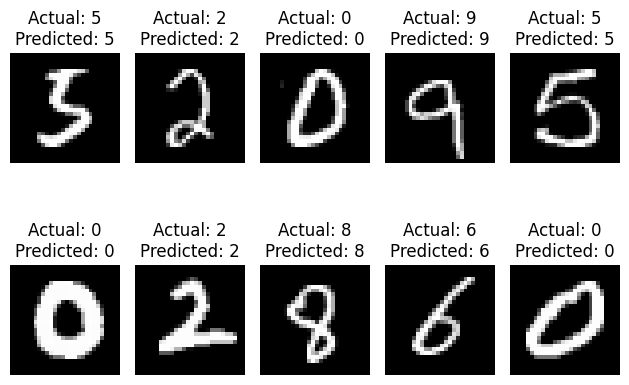

In [17]:
import random
# Randomly select 10 indices from the test set
random_indices = random.sample(range(len(x_test)), 10)

# Plot the images with actual and predicted labels
# plt.figure(figsize=(10, 10))

for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i+1)  # 2 rows and 5 columns of images
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')  # Reshape if necessary (e.g., for 28x28 images)
    
    # Actual and Predicted Labels
    actual_label = y_true_classes[idx]
    predicted_label = y_pred_classes[idx]
    
    plt.title(f'Actual: {actual_label}\nPredicted: {predicted_label}')
    plt.axis('off')  # Hide axis ticks

plt.tight_layout()
plt.show()

# LSTM

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# 1. Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to fit LSTM input: (samples, time steps, features)
# In this case, each image is 28x28 pixels, so we have 28 time steps with 28 features (pixels per row).
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28))
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [15]:
# 2. Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(28, 28), return_sequences=False))  # 128 units, 28 time steps, 28 features
model.add(Dropout(0.2))  # Dropout for regularization
model.add(Dense(10, activation='softmax'))  # Output layer with 10 classes for MNIST digits

In [16]:
# 3. Compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [17]:
# 4. Train the model
history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6645 - loss: 1.0038 - val_accuracy: 0.9460 - val_loss: 0.1790
Epoch 2/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9497 - loss: 0.1710 - val_accuracy: 0.9649 - val_loss: 0.1145
Epoch 3/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9663 - loss: 0.1134 - val_accuracy: 0.9724 - val_loss: 0.0874
Epoch 4/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9755 - loss: 0.0804 - val_accuracy: 0.9789 - val_loss: 0.0747
Epoch 5/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9800 - loss: 0.0684 - val_accuracy: 0.9779 - val_loss: 0.0732
Epoch 6/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9837 - loss: 0.0552 - val_accuracy: 0.9827 - val_loss: 0.0595
Epoch 7/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9850 - loss: 0.0495 - val_accuracy: 0.9810 - val_loss: 0.0623
Epoch 8/15
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9878 - loss: 0.0402 - val_accuracy: 0.

In [18]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9843 - loss: 0.0520
Test Accuracy: 0.9886


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


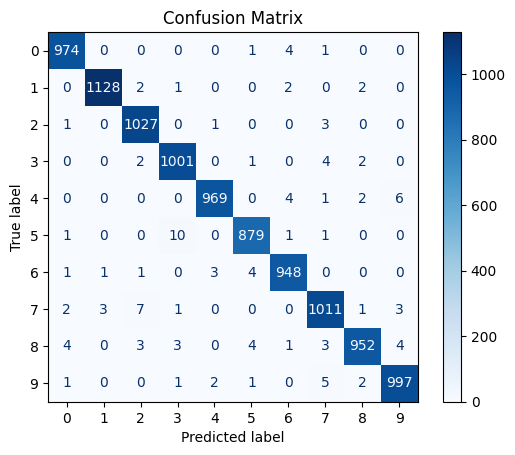

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1) 

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

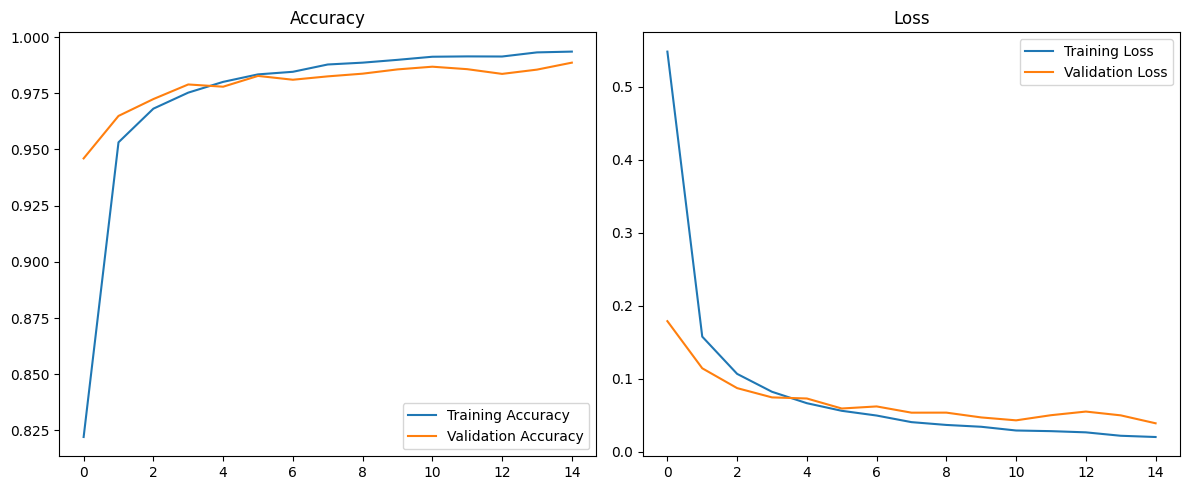

In [24]:
# Plot accuracy and loss curves
plt.figure(figsize=(12, 5))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Results

| Metrics| 3-Layer Dense Model | CNN | LSTM |
|-----|-----|-----|----|
|Test Accuracy|0.9760|0.9903|0.9886|